# График в виде гистограммы

In [97]:
from basic_graphs import load_prices
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# from matplotlib import pyplot, mlab
plt.rcParams['figure.figsize'] = (16,12)
# plt.rcParams['figure.dpi'] = 200
import numpy as np
import scipy.stats as stats
import pandas as pd

In [98]:
# Шрифт надписей к графикам
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

In [99]:
spx = load_prices('../data/^spx_d.csv')  # Читаем данные их файла в DF
spx

,Open,High,Low,Close,Volume
Date,,,,,
2000-07-03,1452.36,1469.83,1450.79,1469.54,5.021111e+08
2000-07-05,1464.51,1467.51,1442.26,1445.38,1.132556e+09
2000-07-06,1446.41,1461.69,1439.58,1456.67,1.052556e+09
2000-07-07,1458.20,1485.15,1456.67,1478.90,1.035222e+09
2000-07-10,1475.48,1486.50,1474.73,1475.62,9.318889e+08
...,...,...,...,...,...
2018-06-08,2765.84,2779.39,2763.59,2779.03,5.110598e+08
2018-06-11,2780.18,2790.21,2780.17,2782.00,5.104920e+08
2018-06-12,2785.60,2789.80,2778.78,2786.85,5.416998e+08


In [100]:
spx = spx[['Close']]  # В 'spx' оставляем только колонку 'Close' (двойные квадратные скобки)
spx

,Close
Date,
2000-07-03,1469.54
2000-07-05,1445.38
2000-07-06,1456.67
2000-07-07,1478.90
2000-07-10,1475.62
...,...
2018-06-08,2779.03
2018-06-11,2782.00
2018-06-12,2786.85


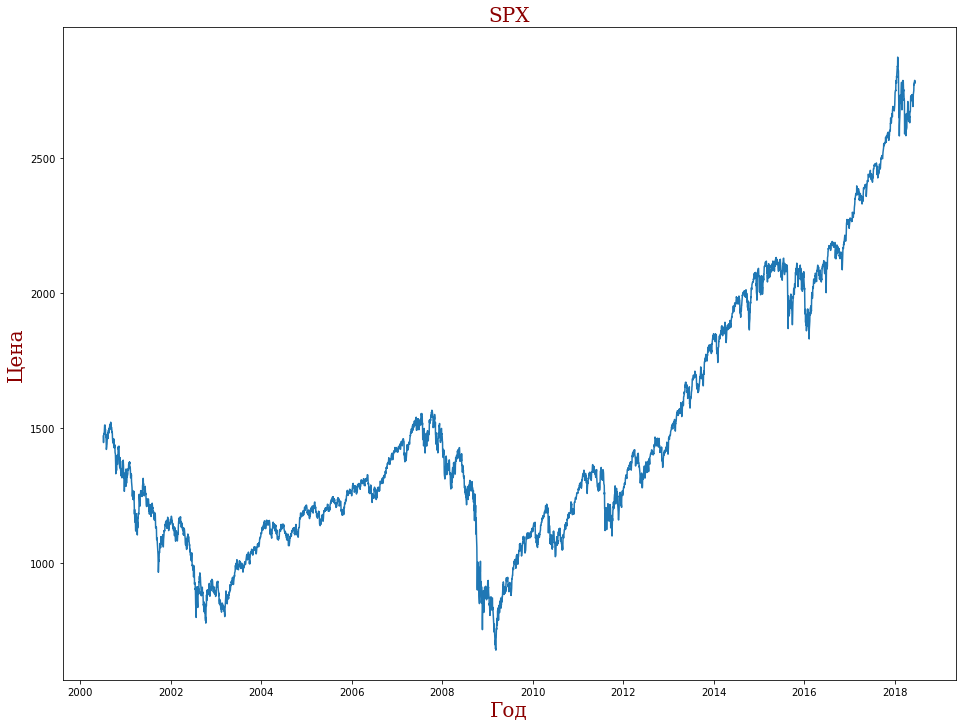

In [101]:
# Рисуем график
plt.plot(spx.index, spx['Close'])
plt.ylabel('Цена', fontdict=font)
plt.xlabel('Год', fontdict=font)
plt.title("SPX", fontdict=font)
plt.show()

In [102]:
spx = spx.assign(Pct_change=spx.pct_change())  # Добавляем колонку процентного изменения
spx

,Close,Pct_change
Date,,
2000-07-03,1469.54,NaN
2000-07-05,1445.38,-0.016441
2000-07-06,1456.67,0.007811
2000-07-07,1478.90,0.015261
2000-07-10,1475.62,-0.002218
...,...,...
2018-06-08,2779.03,0.003126
2018-06-11,2782.00,0.001069
2018-06-12,2786.85,0.001743


Т.к. первое значение "NaN" его отбрасываем

Создаем список close в котором будут все значения процентного изменения кроме первого (дата нам не нужна)

In [103]:
close = spx['Pct_change'].values[1:]  # Выбираем срез без первого значения
close

array([-0.01644052,  0.00781109,  0.01526083, ...,  0.00174335,
       -0.00402605,  0.00247151])

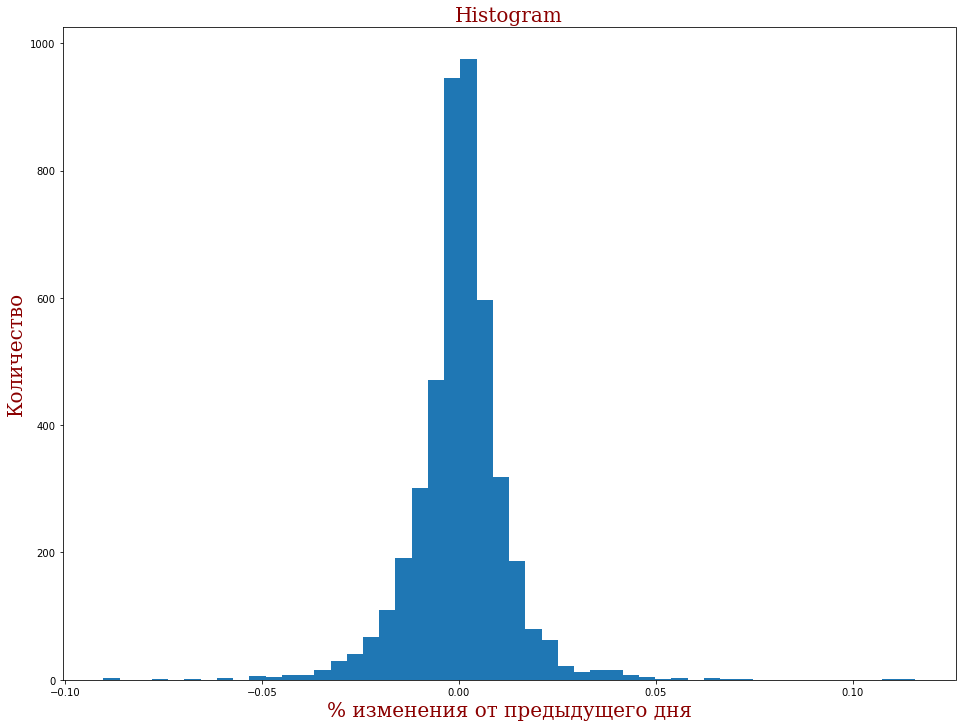

In [104]:
# Рисуем график гистограммы 
plt.hist(close, bins=50)  # количество ячеек одинаковой ширины 50
plt.ylabel('Количество', fontdict=font)
plt.xlabel('% изменения от предыдущего дня', fontdict=font)
plt.title("Histogram", fontdict=font)
plt.show()

Количество ячеек (столбцов) patches=<a list of 50 Patch objects>
Количественные значения в столбцах (Х ось) n=array([  3.,   0.,   0.,   1.,   0.,   2.,   0.,   3.,   0.,   6.,   5.,
         8.,   7.,  15.,  29.,  41.,  68., 110., 191., 301., 471., 945.,
       976., 596., 319., 187.,  80.,  63.,  22.,  13.,  15.,  15.,   7.,
         4.,   2.,   3.,   0.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   1.])
Процент отклонения для каждого столбца (Y ось) buckets=array([-0.0903498 , -0.08622679, -0.08210379, -0.07798079, -0.07385778,
       -0.06973478, -0.06561178, -0.06148877, -0.05736577, -0.05324277,
       -0.04911976, -0.04499676, -0.04087376, -0.03675076, -0.03262775,
       -0.02850475, -0.02438175, -0.02025874, -0.01613574, -0.01201274,
       -0.00788973, -0.00376673,  0.00035627,  0.00447928,  0.00860228,
        0.01272528,  0.01684829,  0.02097129,  0.02509429,  0.02921729,
        0.0333403 ,  0.0374633 ,  0.0415863 ,  0.04570931,  0.04983

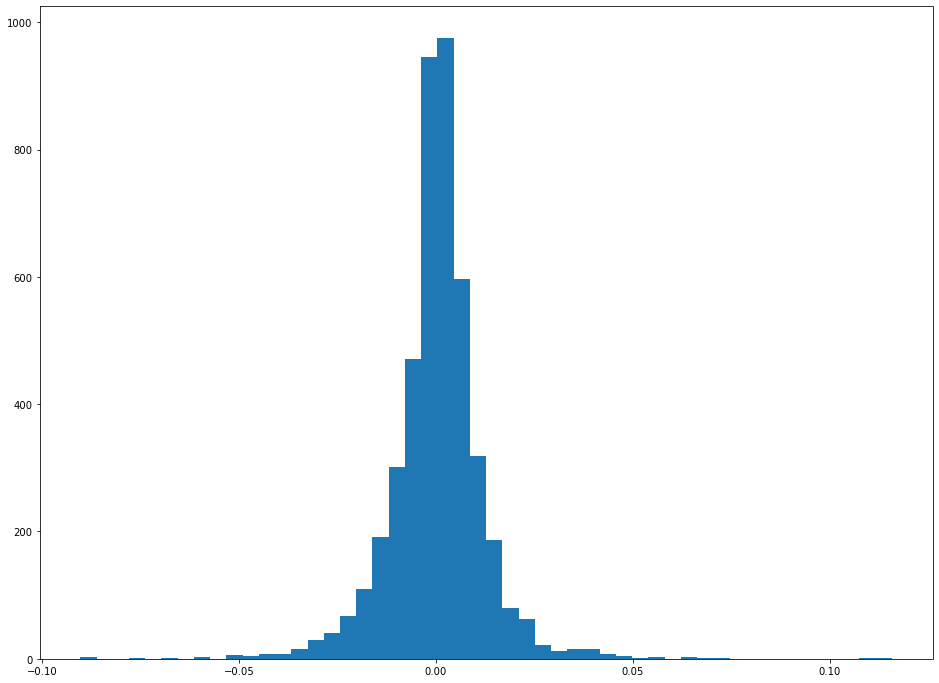

In [105]:
# Получим дополнительную информацию из гистограммы
n, buckets, patches = plt.hist(close, 50)
print(f'Количество ячеек (столбцов) {patches=}')
print(f'Количественные значения в столбцах (Х ось) {n=}')
print(f'Процент отклонения для каждого столбца (Y ось) {buckets=}')


Полученные данные (n, buckets, patches) впишем в функцию нормального распределения

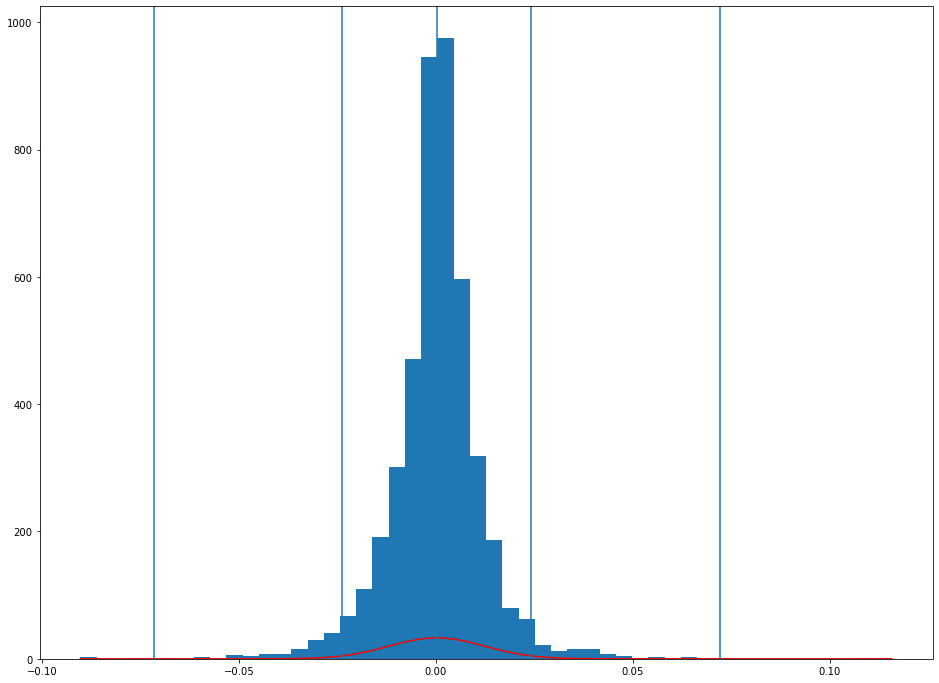

In [106]:
mean = close.mean()
std = close.std()  # Стандартная девиация
best_fit_line = stats.norm.pdf(buckets, mean, std)
plt.plot(buckets, best_fit_line, 'red')  # Нормальное распределение рисуем красной линией
plt.hist(close, 50)

# Линии стандартных отклонений
plt.axvline(x=mean)
plt.axvline(x=mean+2*std)
plt.axvline(x=mean-2*std)
plt.axvline(x=mean+6*std)
plt.axvline(x=mean-6*std)

plt.show()

Полученное распределение не является нормальным из-за выбросов по краям. Наглядно видно как рисуется красная линия.  
В данном случае график нормального распределения пытается вписаться в наши данные, но из-за выбросов по краям он такой низкий.
* * *

Посмотрим на наши средние значения

In [107]:
print(f'Среднее значение:{mean=}, Стандартное отклонение:{std=}')

Среднее значение:mean=0.00021333402480649502, Стандартное отклонение:std=0.011989384054045631


In [108]:
# mean = close.mean()
# std = close.std()  # Стандартная девиация
# best_fit_line = stats.norm.pdf(buckets, mean, std, normed=1)
# plt.plot(buckets, best_fit_line, 'red')  # Нормальное распределение рисуем красной линией
# plt.hist(close, 50)
# plt.show()

Нормализация данных  (normed=1) не удалась.  
В будущем нужно вернуться к этому вопросу.

## Проверяем как выглядит нормальное распределение для недельных графиков.

In [109]:
spx = load_prices('../data/^spx_d.csv')
spx = spx[['Close']]  # В 'spx' оставляем только колонку 'Close'
min_date = spx.index.min()  # Минимальное значение в данных по индексу, а в индексе у нас время
max_date = spx.index.max()  # Максимальное значение в данных по индексу
weekend_index = pd.date_range(min_date, max_date, freq="W")
weekend_index

DatetimeIndex(['2000-07-09', '2000-07-16', '2000-07-23', '2000-07-30',
               '2000-08-06', '2000-08-13', '2000-08-20', '2000-08-27',
               '2000-09-03', '2000-09-10',
               ...
               '2018-04-08', '2018-04-15', '2018-04-22', '2018-04-29',
               '2018-05-06', '2018-05-13', '2018-05-20', '2018-05-27',
               '2018-06-03', '2018-06-10'],
              dtype='datetime64[ns]', length=936, freq='W-SUN')

Надо все даты подвинуть на один день т.к. старт с воскресенья нас не устраивает

In [110]:
# Сдвигаем на 1 день
weekstart_index = weekend_index.shift(1, freq="D")
weekstart_index

DatetimeIndex(['2000-07-10', '2000-07-17', '2000-07-24', '2000-07-31',
               '2000-08-07', '2000-08-14', '2000-08-21', '2000-08-28',
               '2000-09-04', '2000-09-11',
               ...
               '2018-04-09', '2018-04-16', '2018-04-23', '2018-04-30',
               '2018-05-07', '2018-05-14', '2018-05-21', '2018-05-28',
               '2018-06-04', '2018-06-11'],
              dtype='datetime64[ns]', length=936, freq='W-MON')

Делаем переиндексацию

In [111]:
spx_w = spx.reindex(weekstart_index)
spx_w

,Close
2000-07-10,1475.62
2000-07-17,1510.49
2000-07-24,1464.29
2000-07-31,1430.83
2000-08-07,1479.32
...,...
2018-05-14,2730.13
2018-05-21,2733.01
2018-05-28,NaN
2018-06-04,2746.87


Есть значения "NaN". Уберем их.

In [112]:
spx_w = spx_w.dropna()
spx_w

,Close
2000-07-10,1475.62
2000-07-17,1510.49
2000-07-24,1464.29
2000-07-31,1430.83
2000-08-07,1479.32
...,...
2018-05-07,2672.63
2018-05-14,2730.13
2018-05-21,2733.01
2018-06-04,2746.87


Потерялось много данных.  
Попробуем избавиться от "NaN" смещением на 2 дня.

In [113]:
weekstart_index = weekend_index.shift(2, freq="D")
spx_w = spx.reindex(weekstart_index)
spx_w = spx_w.dropna()
spx_w

,Close
2000-07-11,1480.88
2000-07-18,1493.74
2000-07-25,1474.47
2000-08-01,1438.10
2000-08-08,1482.80
...,...
2018-05-15,2711.45
2018-05-22,2724.44
2018-05-29,2689.86
2018-06-05,2748.80


При смещении на 2 дня получилось 925 против 846. Это намного лучше.
* * *

Делаем всё тоже самое, что и для предыдущих (дневных значений)

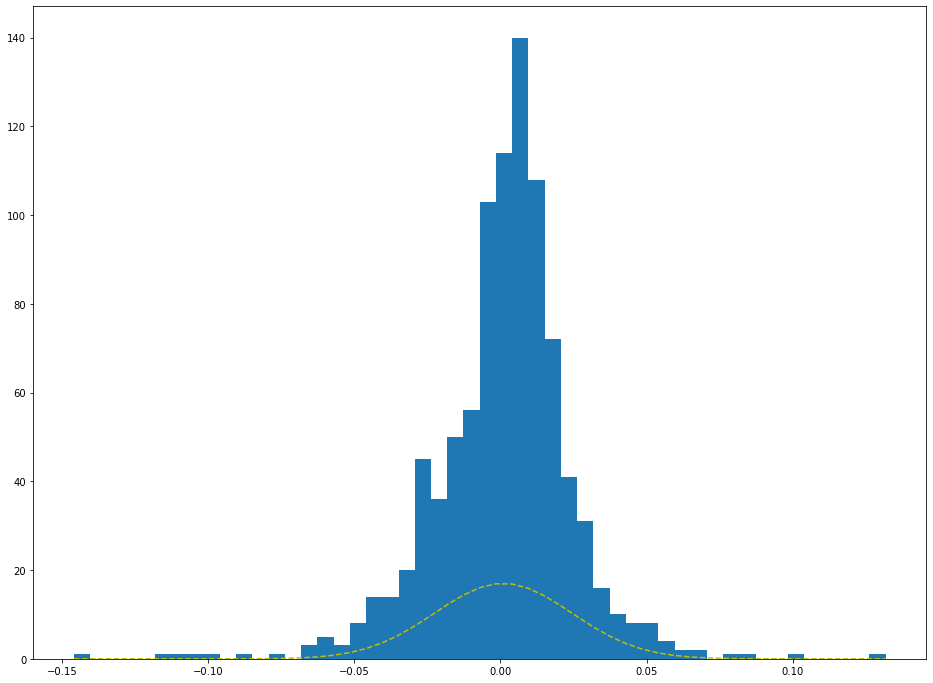

In [114]:
spx_w = spx_w.assign(Pct_change=spx_w.pct_change())  # Добавляем колонку процентного изменения
close = spx_w['Pct_change'].values[1:]  # Берем срез без первого элемента т.к. он 'NaN'
n, buckets, patches = plt.hist(close, 50)
mean = close.mean()  # Среднее значение
std = close.std()  # Стандартная девиация (стандартное отклонение)
best_fit_line = stats.norm.pdf(buckets, mean, std)
plt.plot(buckets, best_fit_line, 'y--')
plt.show()

Недельные данные относительно нормального распределения выгледят лучше

## Теперь сделаем распределение по Гауссу

In [115]:
import numpy as np

In [116]:
# Не работает нормально в связи с обновлением

# normal_dist = np.random.normal(mean, std, 5000)  # Нормальное распределение
# n_nd, buckets_nd, patches_nd = plt.hist(normal_dist, 50)

# mean = close.mean()  # Среднее значение
# std = close.std()  # Стандартная девиация (стандартное отклонение)

# best_fit_line_nd = stats.norm.pdf(normal_dist, mean, std)
# plt.plot(buckets, best_fit_line_nd, 'y--')
# plt.show()

In [117]:
n_nd, buckets_nd, patches_nd = plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'